In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import integrate, optimize, signal

In [2]:
data_dir = 'data/prior'

os.listdir(data_dir)

['.DS_Store', 'm1.0Y0.26FeH0.0MLT2.1ov0.003556dif1']

In [3]:
track_name = 'm1.0Y0.26FeH0.0MLT2.1ov0.003556dif1'

index_filename = 'profiles.index'
data = np.loadtxt(os.path.join(data_dir, track_name, index_filename), dtype=int, skiprows=1)
index_cols = ['model_number', 'priority', 'profile_number']
index = pd.DataFrame(data, columns=index_cols)
index.head()

,model_number,priority,profile_number
0,1,2,1
1,150,3,2
2,151,2,3
3,152,1,4
4,153,1,5


In [4]:
profile_dir = 'profiles'
profiles = os.listdir(os.path.join(data_dir, track_name, profile_dir))
profiles = [p for p in profiles if p.endswith('GYRE')]
profile_num = [int(p.split('.')[0].strip('profile')) for p in profiles]
data = [[i, j] for i, j in zip(profile_num, profiles)]
filenames = pd.DataFrame(data, columns=['profile_number', 'filename'])
filenames.head()

,profile_number,filename
0,92,profile92.data.GYRE
1,1167,profile1167.data.GYRE
2,284,profile284.data.GYRE
3,767,profile767.data.GYRE
4,551,profile551.data.GYRE


In [5]:
index.merge(filenames, on='profile_number')

,model_number,priority,profile_number,filename
0,1,2,1,profile1.data.GYRE
1,150,3,2,profile2.data.GYRE
2,151,2,3,profile3.data.GYRE
3,152,1,4,profile4.data.GYRE
4,153,1,5,profile5.data.GYRE
...,...,...,...,...
1353,2092,1,1354,profile1354.data.GYRE
1354,2094,1,1355,profile1355.data.GYRE
1355,2096,1,1356,profile1356.data.GYRE
1356,2098,1,1357,profile1357.data.GYRE


In [6]:
history_filename = 'history.data'
history = pd.read_table(os.path.join(data_dir, track_name, history_filename), delimiter='\s+')
history.head()

,model_number,num_zones,star_age,time_step,star_mass,log_xmstar,star_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,acoustic_radius,total_angular_momentum,core_overshoot_Hp,core_overshoot_f,core_overshoot_f0,core_overshoot_hstep,core_overshoot_r0,num_retries,num_backups,num_iters
0,151,658,115278.112196,8754.150421,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,39730.031532,0.0,3.270604e+08,0.003556,0.001778,0.0,3.468626e+11,0,0,5
1,152,1145,122281.432533,7003.320337,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,38467.204964,0.0,3.101783e+08,0.003556,0.001778,0.0,3.371283e+11,0,0,3
2,153,1166,127884.088803,5602.656270,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,37529.810278,0.0,2.962787e+08,0.003556,0.001778,0.0,3.299969e+11,0,0,3
3,154,1166,132366.213819,4482.125016,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,36823.192651,0.0,2.872377e+08,0.003556,0.001778,0.0,3.246619e+11,0,0,3
4,155,1167,135951.913831,3585.700013,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,36283.179340,0.0,2.802509e+08,0.003556,0.001778,0.0,3.206108e+11,0,0,3


In [7]:
df = (index.merge(filenames, on='profile_number')).merge(history, on='model_number')
df.head()

,model_number,priority,profile_number,filename,num_zones,star_age,time_step,star_mass,log_xmstar,star_mdot,...,acoustic_radius,total_angular_momentum,core_overshoot_Hp,core_overshoot_f,core_overshoot_f0,core_overshoot_hstep,core_overshoot_r0,num_retries,num_backups,num_iters
0,151,2,3,profile3.data.GYRE,658,115278.112196,8754.150421,1.0,33.298678,0.0,...,39730.031532,0.0,3.270604e+08,0.003556,0.001778,0.0,3.468626e+11,0,0,5
1,152,1,4,profile4.data.GYRE,1145,122281.432533,7003.320337,1.0,33.298678,0.0,...,38467.204964,0.0,3.101783e+08,0.003556,0.001778,0.0,3.371283e+11,0,0,3
2,153,1,5,profile5.data.GYRE,1166,127884.088803,5602.656270,1.0,33.298678,0.0,...,37529.810278,0.0,2.962787e+08,0.003556,0.001778,0.0,3.299969e+11,0,0,3
3,154,1,6,profile6.data.GYRE,1166,132366.213819,4482.125016,1.0,33.298678,0.0,...,36823.192651,0.0,2.872377e+08,0.003556,0.001778,0.0,3.246619e+11,0,0,3
4,155,1,7,profile7.data.GYRE,1167,135951.913831,3585.700013,1.0,33.298678,0.0,...,36283.179340,0.0,2.802509e+08,0.003556,0.001778,0.0,3.206108e+11,0,0,3


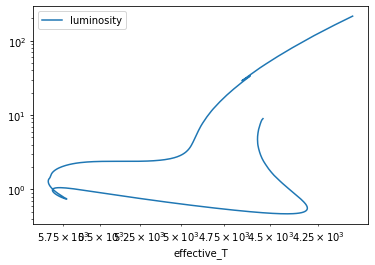

In [8]:
ax = df.plot(x='effective_T', y='luminosity')
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_yscale('log');

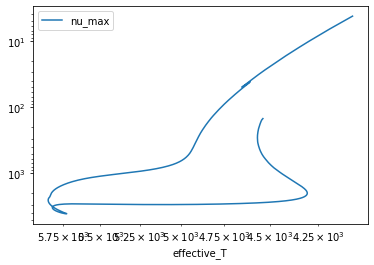

In [9]:
ax = df.plot(x='effective_T', y='nu_max')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale('log')
ax.set_yscale('log');

In [10]:
import pygyre as pg

In [11]:
# star = df.loc[(df['nu_max'] < 500.) & (df['effective_T'] > 4800.)].iloc[0]
star = df.loc[708]

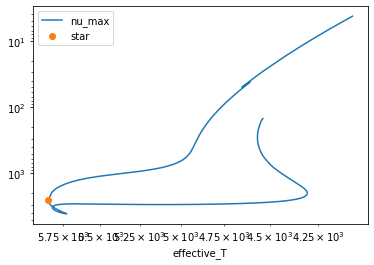

In [12]:
ax = df.plot(x='effective_T', y='nu_max')
ax.plot(star['effective_T'], star['nu_max'], marker='o', label='star', linestyle='none')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend();

In [13]:
profile = pg.read_model(
    os.path.join(data_dir, track_name, profile_dir, star['filename'])
).to_pandas()
profile.head()

,k,r,M_r,L_r,P,T,rho,nabla,N^2,Gamma_1,nabla_ad,delta,kap,kap kap_T,kap kap_rho,eps_nuc,eps_nuc*eps_T,eps_nuc*eps_rho,Omega_rot
0,1,0.000000e+00,0.000000e+00,0.000000e+00,3.422360e+17,1.756328e+07,246.788811,0.300208,0.000000e+00,1.669600,0.395473,0.958836,0.996389,-1.956642,0.349897,21.231148,320.503462,22.907584,0.0
1,2,5.317470e+07,1.554170e+26,3.302371e+27,3.422131e+17,1.756292e+07,246.761867,0.300227,1.003654e-08,1.669607,0.395471,0.958831,0.996415,-1.956677,0.349906,21.231917,320.495961,22.908215,0.0
2,3,6.699678e+07,3.108340e+26,6.604827e+27,3.421982e+17,1.756269e+07,246.745352,0.300239,1.242731e-08,1.669612,0.395470,0.958828,0.996432,-1.956700,0.349912,21.231956,320.485121,22.908161,0.0
3,4,8.441223e+07,6.216680e+26,1.320936e+28,3.421750e+17,1.756234e+07,246.723664,0.300244,1.817737e-08,1.669617,0.395468,0.958823,0.996458,-1.956742,0.349922,21.230267,320.444588,22.906156,0.0
4,5,1.063558e+08,1.243336e+27,2.641722e+28,3.421382e+17,1.756177e+07,246.688553,0.300245,2.809786e-08,1.669626,0.395465,0.958816,0.996498,-1.956807,0.349938,21.227912,320.384885,22.903362,0.0


In [14]:
import astropy.constants.iau2015 as const

In [15]:
profile['r/R'] = profile['r']/star['radius']/const.R_sun.cgs

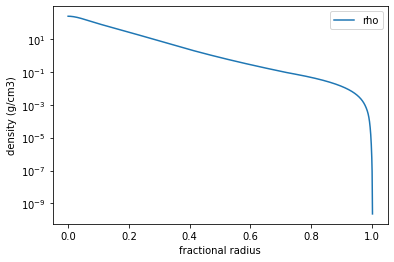

In [16]:
ax = profile.plot(x='r/R', y='rho')
# ax.set_xscale('log')
ax.set_xlabel('fractional radius')
ax.set_ylabel('density (g/cm3)')
ax.set_yscale('log');

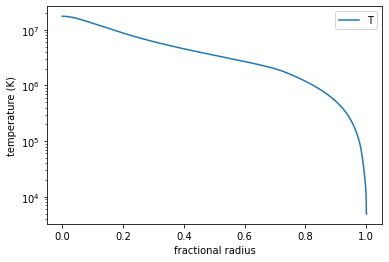

In [17]:
ax = profile.plot(x='r/R', y='T')
# ax.set_xscale('log')
ax.set_xlabel('fractional radius')
ax.set_ylabel('temperature (K)')
ax.set_yscale('log');

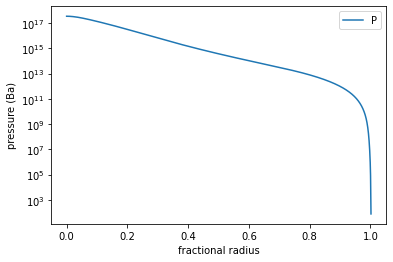

In [18]:
ax = profile.plot(x='r/R', y='P')
# ax.set_xscale('log')
ax.set_xlabel('fractional radius')
ax.set_ylabel('pressure (Ba)')
ax.set_yscale('log');

$$1\,\mathrm{Ba} \equiv 1\,\mathrm{dyn.\,cm^{−2}} \equiv 1\,\mathrm{g\,cm^{-1}\,s^{-2}}$$

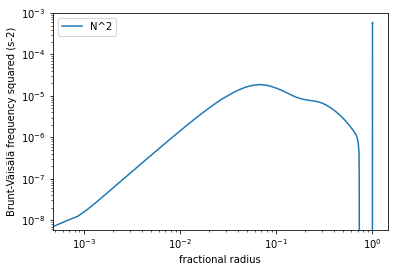

In [19]:
ax = profile.plot(x='r/R', y='N^2')

ax.set_xlabel('fractional radius')
ax.set_ylabel('Brunt-Väisälä frequency squared (s-2)')
ax.set_yscale('log')
ax.set_xscale('log')

Text(0, 0.5, 'first adiabatic exponant')

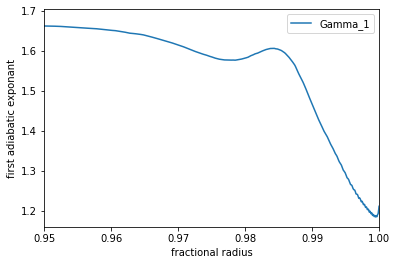

In [20]:
ax = profile.plot(x='r/R', y='Gamma_1')
# ax.set_yscale('log')
ax.set_xlim(0.95, 1.)
ax.set_xlabel('fractional radius')
ax.set_ylabel('first adiabatic exponant')

In [21]:
profile['c'] = np.sqrt(profile['Gamma_1'] * profile['P'] / profile['rho'])

Text(0, 0.5, 'sound speed (cm s-1)')

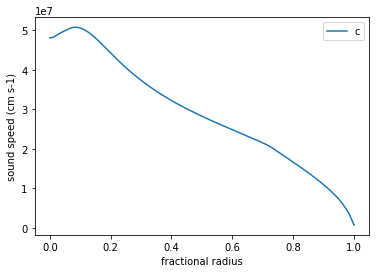

In [22]:
ax = profile.plot(x='r/R', y='c')
# ax.set_yscale('log')
# ax.set_xlim(0.95, 1.)
ax.set_xlabel('fractional radius')
ax.set_ylabel('sound speed (cm s-1)')

A localised feature in the sound-speed profile $c$ at radius $r$ inside a star introduces an oscillatory term as a function of radial order $n$,

$$\delta \nu_{n, l} \propto \sin(4\pi\tau\nu_{n, l} + \phi),$$

where,

$$\tau = \int_r^R \frac{\mathrm{d}r}{c},$$

and $R$ is the radius of the star (Basu et al. 2004; Gough 1990).

In [23]:
profile['tau'] = - integrate.cumtrapz(1/profile['c'].iloc[::-1], profile['r'].iloc[::-1], initial=0)[::-1]

In [40]:
profile['tau']

0       4265.759265
1       4264.654186
2       4264.366940
3       4264.005022
4       4263.549010
           ...     
1769       1.828198
1770       1.358358
1771       0.888499
1772       0.418621
1773      -0.000000
Name: tau, Length: 1774, dtype: float64

In [24]:
heII_cond = (profile['T'] > 4e4) & (profile['T'] < 2e5)

Text(0, 0.5, 'first adiabatic exponant')

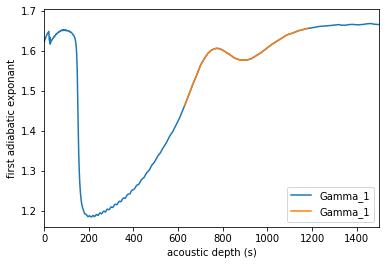

In [25]:
ax = profile.plot(x='tau', y='Gamma_1')

profile[heII_cond].plot(x='tau', y='Gamma_1', color='C1', ax=ax)
ax.set_xlim(0, 1500)
ax.set_xlabel('acoustic depth (s)')
ax.set_ylabel('first adiabatic exponant')

Text(0, 0.5, 'first adiabatic exponant')

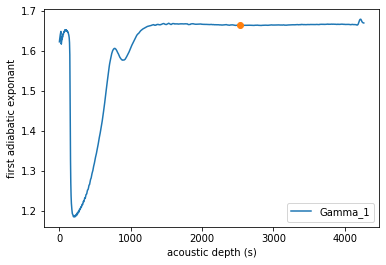

In [26]:
bcz_cond = profile['N^2'] < 0  # The
ax = profile.plot(x='tau', y='Gamma_1')

tau_cz = profile.loc[bcz_cond, 'tau'].iloc[0]
gamma_cz = profile.loc[bcz_cond, 'Gamma_1'].iloc[0]

ax.plot(tau_cz, gamma_cz, linestyle='none', marker='o', label='BCZ')
ax.set_xlabel('acoustic depth (s)')
ax.set_ylabel('first adiabatic exponant')

In [27]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [28]:
profile['gamma_smooth'] = smooth(profile['Gamma_1'], 50)

<AxesSubplot:xlabel='tau'>

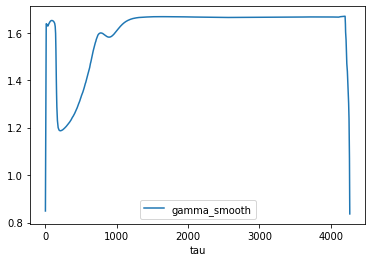

In [29]:
profile.plot(x='tau', y='gamma_smooth')

In [30]:
gamma = profile[heII_cond]['gamma_smooth'].to_numpy()

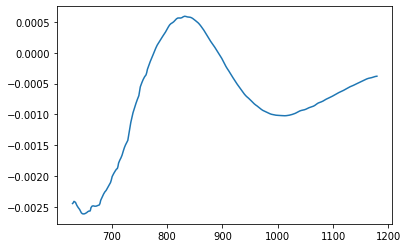

In [31]:
tau = profile[heII_cond]['tau'].to_numpy()
dgamma = np.gradient(gamma)
plt.plot(tau, dgamma)

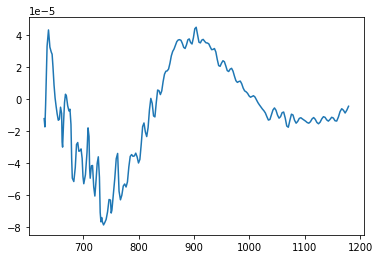

In [32]:
dgamma2 = np.gradient(dgamma)
plt.plot(tau, dgamma2)

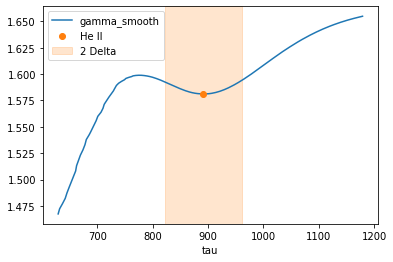

In [33]:
mask = (dgamma > 0) & (dgamma2 > 0)
tau_he = tau[mask][0]
gamma_he = gamma[mask][0]

delta_he = tau[mask][0] - tau[mask][-1]

ax = profile[heII_cond].plot(x='tau', y='gamma_smooth')
ax.plot(tau_he, gamma_he, marker='o', linestyle='none', label='He II')
ax.axvspan(tau_he-delta_he, tau_he+delta_he, alpha=0.2, color='C1', label='2 Delta')

ax.legend();

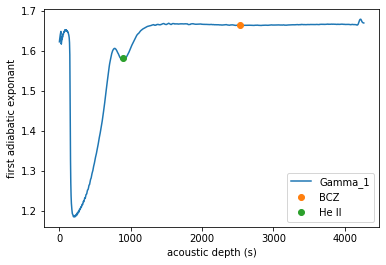

In [34]:
bcz_cond = profile['N^2'] < 0  # The
ax = profile.plot(x='tau', y='Gamma_1')

ax.plot(tau_cz, gamma_cz, linestyle='none', marker='o', label='BCZ')
ax.plot(tau_he, gamma_he, marker='o', linestyle='none', label='He II')

ax.set_xlabel('acoustic depth (s)')
ax.set_ylabel('first adiabatic exponant')
ax.legend();

In [36]:
tau_he

891.5020097788637

In [1067]:
drho_dr = np.gradient(np.log(profile['rho']), profile['r'])
d2rho_dr2 = np.gradient(drho_dr, profile['r'])

In [1068]:
g = np.gradient(d2rho_dr2*1e20, profile['r'])

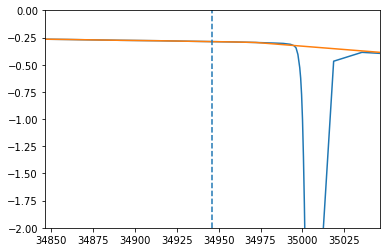

In [1073]:
cond = np.abs(g) < 1e-9

plt.plot(profile['tau'], drho_dr*1e10)
plt.plot(profile.loc[cond, 'tau'], drho_dr[cond]*1e10)
# plt.plot(profile['r/R'], d2rho_dr2)
plt.xlim(tau_cz-100, tau_cz+100)
# plt.xlim(0.1, 0.12)
# plt.ylim(-1e-17, 1e-17)
plt.ylim(-2, -0.)
plt.axvline(tau_cz, linestyle='--')

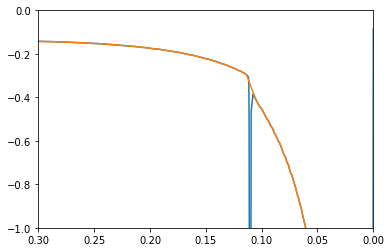

In [1074]:
plt.plot(profile['r/R'], drho_dr*1e10)
plt.plot(profile.loc[cond, 'r/R'], drho_dr[cond]*1e10)
# plt.plot(profile['r/R'], d2rho_dr2)
# plt.xlim(tau_cz-1000, tau_cz+1000)
plt.xlim(0.0, 0.3)
# plt.ylim(-1e-17, 1e-17)
plt.ylim(-1, -0.)
plt.gca().invert_xaxis()

In [1075]:
width = 100
pre_cz = (profile['tau'] < tau_cz) & (profile['tau'] > tau_cz - width)
p1 = np.polyfit(profile.loc[pre_cz & cond, 'r'], drho_dr[pre_cz & cond], 1)

post_cz = (profile['tau'] > tau_cz) & (profile['tau'] < tau_cz + width)
p2 = np.polyfit(profile.loc[post_cz & cond, 'r'], drho_dr[post_cz & cond], 1)

In [1076]:
r_cz = profile.loc[profile['tau']==tau_cz, 'r'].iloc[0]
grad_minus = p1[0]
# grad_plus = 2 * p2[0] * r_cz + p2[1]
grad_plus = p2[0]

In [1077]:
delta = (grad_plus - grad_minus)
delta

4.776129057505379e-22

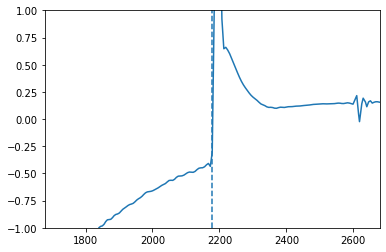

In [791]:
cond = np.abs(g)<1e-8
plt.plot(profile.loc[cond, 'tau'], d2rho_dr2[cond]*1e20)
# plt.plot(profile['r/R'], d2rho_dr2)
plt.xlim(tau_cz-500, tau_cz+500)
# plt.xlim(0.1, 0.12)
# plt.ylim(-1e-17, 1e-17)
plt.ylim(-1, 1)
plt.axvline(tau_cz, linestyle='--')

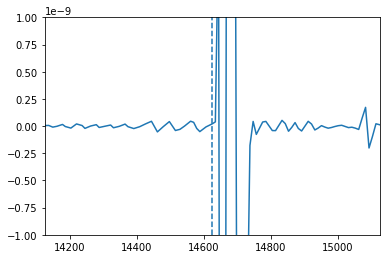

In [863]:
plt.plot(profile['tau'], np.gradient(d2rho_dr2*1e20, profile['r']))
# plt.plot(profile['r/R'], d2rho_dr2)
plt.xlim(tau_cz-500, tau_cz+500)
# plt.xlim(0.1, 0.12)
# plt.ylim(-1e-17, 1e-17)
plt.ylim(-1e-9, 1e-9)
plt.axvline(tau_cz, linestyle='--')